In [1]:
import scipy as sp
from scipy.io import wavfile
import IPython
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
# Imported the Signal class I made in Fourier1.
class Signal(object):

    def __init__(self, rate, samples):
        self.rate = rate
        self.samples = samples
        self.nsamples = len(samples)
        
    def plot(self):
        dom=np.linspace(0, float(self.nsamples)/self.rate, self.nsamples)
        
        dft = sp.fft(self.samples)
        x_vals = sp.arange(1, len(dft)+1, 1)*1.
        x_vals = x_vals/len(self.samples)
        x_vals *= self.rate
        
        plt.subplot(121)
        plt.plot(dom, self.samples)
        plt.xlabel("Seconds")
        
        plt.subplot(122)
        plt.plot(x_vals, dft)
        
        plt.show()
        
    def export(self, filename):
        scale = np.max(np.abs(self.samples))
        samples = self.samples*32767./scale
        samples = sp.int16(samples)
        wavfile.write(filename, self.rate, samples)
        

In [4]:
# Inspect the discrete Fourier transform to find where the noise is
rate, data = wavfile.read('Noisysignal2.wav')
fsig = sp.fft(data, axis = 0)

# Remove the noise.
for j in xrange(14900, 75000):
    fsig[j] = 0
    fsig[-j] = 0
    
newsig = sp.ifft(fsig)
newsig = sp.real(newsig)
newsig = sp.int16(newsig/sp.absolute(newsig).max() * 32767)


In [5]:
IPython.display.Audio('newsig.wav')

"So, first of all, let me assert my firm belief that the only thing we have to fear is fear itself." -FDR's First Inaugural Address

In [6]:
rate1, data1 = wavfile.read('chopin.wav')
rate2, data2 = wavfile.read('balloon.wav')

# Add several seconds of silence to avoid mixing echos
b = np.zeros(len(data2))
chopin = np.concatenate((data1, b), axis=0)
c = np.zeros(len(data1)) # Make the second file the same length as the first.
balloon = np.concatenate((data2[:len(data2)/2], c, data2[len(data2/2)/2:]))

# Calculate the convolution of the signals and then the inverse Fourier Transform.
x = sp.ifft(sp.fft(chopin)*sp.fft(balloon))

sig = Signal(rate1, x)
sig.export('newchopin.wav')

/Users/kearajune/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


In [7]:
IPython.display.Audio('newchopin.wav')

In [8]:
# Create sample white noise containing all frequencies.
samplerate = 22050
noise = sp.int16(sp.random.randint(-32767, 32767, samplerate*10))

<IPython.core.display.Javascript object>


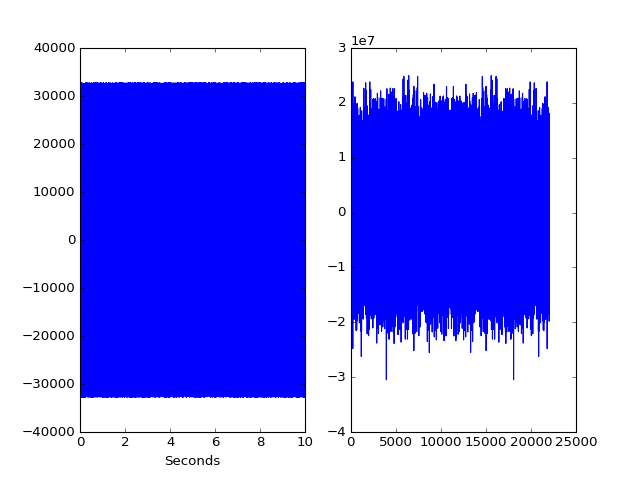

/Users/kearajune/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [9]:
white = Signal(samplerate, noise)
white.export('whitenoise.wav')

white.plot()

In [10]:
IPython.display.Audio('whitenoise.wav')

In [11]:
IPython.display.Audio('Noisysignal2.wav')

In [12]:
IPython.display.Audio('chopin.wav')